### Урок 2. Обзор основных алгоритмов машинного обучения, используемых в соревнованиях

### -- Автор: Шенк Евгений Станиславович

### Домашнее задание 2:
Задание 1: отобрать только числовые признаки и обучить модель XGBoost с параметром booster = gbtree. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).  
Задание 2: обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 1.  
Задание 4: для числовых признаков обучить модель LightGBM. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).  
Задание 5: обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 4.  
Задание 6: обработать категориальные признаки встроенным методом в LightGBM. Выполнить задание 4. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 5.  
Задание 7: для числовых признаков обучить модель CatBoost. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).  
Задание 8: обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 7.  
Задание 9: обработать категориальные признаки встроенным методом в CatBoost. Выполнить задание 7. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 8.  
Задание 10: построить ROC-кривую для всех построенных алгоритмов на обучающей и тестовой выборке. Сделать выводы о работе алгоритмов с точки зрения качества на тестовой выборке и с точки зрения переобучения.  

Задание на повторение:  
Задание не обязательно к выполнению, но очень рекомендуется для понимания набора данных, этот набор данных будет использован и для следующего домашнего задания.  

Задание 1: Построить график распределения времени совершения транзакции для обучающей / тестовой выборки, сделать выводы о том, как разбиты данные и какие виды валидации могут подойти для данной задачи.  
Задание 2: построить scatter-plot зависимости суммы транзакции от времени совершения транзакции. Построить графики для обучающей выборки и для тестовой выборки, для обучающей выборки - построить как для целевой переменной = 0, так и для переменной = 1. Сделать выводы.  
Задание 3: построить распределение признака TransactionAmt в логарифмическом масштабе, сделать выводы о близости распредления к нормальному распределению. Построить распределение признака в логарифмическому масштабе для обучающей выборк и для тестовой выборки, сделать выводы.  
Задание 4: построить распределение признака целевой переменной в зависимости от значений категориальных признаков ProductCD, card4, card6. Сделать выводы.   

In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as st
from scipy.stats import probplot

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
pd.options.display.max_columns = 400

### Задание 1-9.

In [3]:
train = pd.read_csv("../data/assignment_2_train.csv")
test = pd.read_csv("../data/assignment_2_test.csv")

print("train.shape = {} rows, {} cols".format(*train.shape))
print("test.shape = {} rows, {} cols".format(*test.shape))

train.shape = 180000 rows, 394 cols
test.shape = 100001 rows, 394 cols


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 541.1+ MB


In [5]:
train.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,1.800000e+05,180000.000000,1.800000e+05,180000.000000,180000.000000,177389.000000,179997.000000,179047.000000,160567.000000,160567.000000,60605.000000,14458.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,80302.00000,83038.000000,106927.000000,68756.00000,24236.000000,11676.000000,33596.000000,33596.000000,134335.000000,59099.000000,20804.000000,18667.000000,20544.000000,131181.000000,59099.000000,59099.000000,59099.000000,59099.000000,59099.000000,59099.000000,59099.000000,59099.000000,59099.000000,59099.000000,59099.000000,134322.000000,134322.000000,134322.000000,134322.000000,134322.000000,134322.000000,134322.000000,134322.000000,134322.000000,134322.000000,134322.000000,134322.000000,134322.000000,134322.000000,134322.000000,134322.000000,134322.000000,134322.000000,134322.000000,134322.000000,134322.000000,134322.000000,134322.000000,106921.000000,106921.000000,106921.000000,106921.000000,106921.000000,106921.000000,106921.000000,106921.000000,106921.000000,106921.000000,106921.000000,106921.000000,106921.000000,106921.000000,106921.000000,106921.000000,106921.00000,106921.000000,134089.000000,134089.000000,134089.000000,134089.000000,134089.000000,134089.000000,134089.000000,134089.000000,134089.000000,134089.000000,134089.000000,134089.000000,134089.000000,134089.000000,134089.000000,134089.000000,134089.000000,134089.000000,134089.000000,134089.000000,134089.000000,134089.000000,131173.000000,131173.000000,131173.000000,131173.000000,131173.000000,131173.000000,131173.000000,131173.000000,131173.000000,131173.000000,131173.000000,131173.000000,131173.000000,131173.000000,131173.000000,131173.000000,131173.000000,131173.000000,131173.000000,131173.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.0,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180

In [6]:
test.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,1.000010e+05,100001.000000,1.000010e+05,100001.000000,100001.000000,98325.000000,99185.000000,98701.000000,88300.000000,88300.000000,39103.000000,4360.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,99732.000000,53475.000000,57535.000000,79300.00000,51368.000000,11065.000000,6062.000000,9458.000000,9458.000000,93964.000000,66962.000000,10316.000000,10716.000000,10299.000000,90682.000000,66962.000000,66962.000000,66962.000000,66962.000000,66962.000000,66962.000000,66962.000000,66962.000000,66962.000000,66962.000000,66962.000000,93959.000000,93959.000000,93959.000000,93959.000000,93959.000000,93959.000000,93959.000000,93959.000000,93959.000000,93959.000000,93959.000000,93959.000000,93959.000000,93959.000000,93959.000000,93959.000000,93959.000000,93959.000000,93959.000000,93959.000000,93959.000000,93959.000000,93959.000000,79286.000000,79286.000000,79286.000000,79286.000000,79286.00000,79286.000000,79286.000000,79286.000000,79286.000000,79286.000000,79286.000000,79286.000000,79286.000000,79286.000000,79286.000000,79286.000000,79286.000000,79286.000000,93581.000000,93581.000000,93581.000000,93581.000000,93581.000000,93581.000000,93581.000000,93581.000000,93581.000000,93581.000000,93581.000000,93581.000000,93581.000000,93581.000000,93581.000000,93581.000000,93581.00000,93581.000000,93581.000000,93581.000000,93581.000000,93581.000000,90676.000000,90676.000000,90676.000000,90676.000000,90676.000000,90676.000000,90676.000000,90676.000000,90676.000000,90676.000000,90676.000000,90676.000000,90676.000000,90676.000000,90676.000000,90676.000000,90676.000000,90676.000000,90676.000000,90676.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.0,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.00000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.00000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100

In [7]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [8]:
numerical_features = train.select_dtypes(include=[np.number])
categorical_features = train.select_dtypes(include=[np.object])
target = train['isFraud']
numerical_features.drop(["isFraud"], axis=1, inplace=True)

In [9]:
numerical_features.columns

Index(['TransactionID', 'TransactionDT', 'TransactionAmt', 'card1', 'card2',
       'card3', 'card5', 'addr1', 'addr2', 'dist1',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=379)

In [10]:
categorical_features.columns

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9'],
      dtype='object')

In [11]:
def categorical_features_preprocessing(df, categorical_features):
    DataFrame = df.copy()
    for feature in categorical_features:
        DataFrame[feature].fillna('0', inplace=True)
        if len(categorical_features[feature].unique()) > 10:
            ordinal_enc = OrdinalEncoder()
            DataFrame[[feature]] = ordinal_enc.fit_transform(DataFrame[[feature]])
            
    DataFrame = pd.get_dummies(DataFrame)
    
    return DataFrame

In [12]:
train_with_cats = categorical_features_preprocessing(train, categorical_features)
train_with_cats.head(3)

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,...,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_0,card4_american express,card4_discover,card4_mastercard,card4_visa,card6_0,card6_charge card,card6_credit,card6_debit,card6_debit or credit,M1_0,M1_F,M1_T,M2_0,M2_F,M2_T,M3_0,M3_F,M3_T,M4_0,M4_M0,M4_M1,M4_M2,M5_0,M5_F,M5_T,M6_0,M6_F,M6_T,M7_0,M7_F,M7_T,M8_0,M8_F,M8_T,M9_0,M9_F,M9_T
0,2987000,0,86400,68.5,13926,NaN,150.0,142.0,315.0,87.0,19.0,NaN,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0
1,2987001,0,86401,29.0,2755,404.0,150.0,102.0,325.0,87.0,NaN,NaN,17.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1

In [13]:
train_with_cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Columns: 425 entries, TransactionID to M9_T
dtypes: float64(378), int64(4), uint8(43)
memory usage: 532.0 MB


In [14]:
data = train[numerical_features.columns]
data_with_cats = train_with_cats.drop(labels=['isFraud'], axis=1)
data_with_cats_no_prep = train.drop(labels=['isFraud'], axis=1)
data_with_cats_no_prep[categorical_features.columns] = data_with_cats_no_prep[categorical_features.columns].fillna('0')
data_with_cats_no_prep[categorical_features.columns] = data_with_cats_no_prep[categorical_features.columns].astype('category')

data_with_cats.head(2)

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,...,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_0,card4_american express,card4_discover,card4_mastercard,card4_visa,card6_0,card6_charge card,card6_credit,card6_debit,card6_debit or credit,M1_0,M1_F,M1_T,M2_0,M2_F,M2_T,M3_0,M3_F,M3_T,M4_0,M4_M0,M4_M1,M4_M2,M5_0,M5_F,M5_T,M6_0,M6_F,M6_T,M7_0,M7_F,M7_T,M8_0,M8_F,M8_T,M9_0,M9_F,M9_T
0,2987000,86400,68.5,13926,NaN,150.0,142.0,315.0,87.0,19.0,NaN,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0
1,2987001,86401,29.0,2755,404.0,150.0,102.0,325.0,87.0,NaN,NaN,17.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,

In [15]:
x_train, x_valid = train_test_split(
    data, train_size=0.8, random_state=2177
)

x_train_cats, x_valid_cats = train_test_split(
    data_with_cats, train_size=0.8, random_state=2177
)

x_train_cats_no_prep, x_valid_cats_no_prep = train_test_split(
    data_with_cats_no_prep, train_size=0.8, random_state=2177
)

y_train, y_valid = train_test_split(
    target, train_size=0.8, random_state=2177
)
print("x_train.shape = {} rows, {} cols".format(*x_train.shape))
print("x_valid.shape = {} rows, {} cols".format(*x_valid.shape))
print("x_train_cats.shape = {} rows, {} cols".format(*x_train_cats.shape))
print("x_valid_cats.shape = {} rows, {} cols".format(*x_valid_cats.shape))

x_train.shape = 144000 rows, 379 cols
x_valid.shape = 36000 rows, 379 cols
x_train_cats.shape = 144000 rows, 424 cols
x_valid_cats.shape = 36000 rows, 424 cols


### Global papams

### Валидация:
Будем проводить кросс-валидацию каждой модели средствами API модели с одинаковыми параметрами:  
num_boost_round = 1000  
early_stopping_rounds = 10  
nfold = 3  
seed = 2177 (random_seed)  
metrics = "auc"  

In [16]:
num_boost_round = 1000
early_stopping_rounds = 10
verbose_eval = 100
nfold = 3

## XGBoost API

In [17]:
params = {
    "booster": "gbtree",
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "learning_rate": 0.1,
    "n_estimators": 1000,
    "reg_lambda": 0,
    "max_depth": 6,
    "gamma": 0,
    "nthread": -1,
    "seed": 2177
}

In [18]:
dtrain = xgb.DMatrix(
    data=x_train, label=y_train
)

dtrain_cats = xgb.DMatrix(
    data=x_train_cats, label=y_train
)

dvalid = xgb.DMatrix(
    data=x_valid, label=y_valid
)

dvalid_cats = xgb.DMatrix(
    data=x_valid_cats, label=y_valid
)

### XGB no categorical_features

In [19]:
model_xgb = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=num_boost_round,
    early_stopping_rounds=early_stopping_rounds,
    evals=[(dtrain, "train"), (dvalid, "valid")],
    verbose_eval=verbose_eval,
    maximize=True,
)

[01:00:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.76200	valid-auc:0.75411
[100]	train-auc:0.95307	valid-auc:0.92992
[200]	train-auc:0.96863	valid-auc:0.93935
[300]	train-auc:0.97754	valid-auc:0.94449
[400]	train-auc:0.98537	valid-auc:0.94906
[500]	train-auc:0.98976	valid-auc:0.95261
[507]	train-auc:0.98984	valid-auc:0.95253


In [20]:
cv_xgb = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=num_boost_round,
    early_stopping_rounds=early_stopping_rounds,
    verbose_eval=verbose_eval,
    stratified=True,
    metrics="auc",
    maximize=True,
    shuffle=True,
    seed=2177,
    nfold=nfold,
)

[01:03:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[01:03:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[01:03:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in la

In [21]:
cv_xgb.tail(3)

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
540,0.995273,0.000115,0.936306,0.005293
541,0.995310,0.000094,0.936284,0.005310
542,0.995341,0.000110,0.936325,0.005262


### XGB with categorical features

In [22]:
model_xgb_cats = xgb.train(
    params=params,
    dtrain=dtrain_cats,
    num_boost_round=num_boost_round,
    early_stopping_rounds=early_stopping_rounds,
    evals=[(dtrain_cats, "train"), (dvalid_cats, "valid")],
    verbose_eval=verbose_eval,
    maximize=True,
)

[01:09:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.76200	valid-auc:0.75412
[100]	train-auc:0.96188	valid-auc:0.93868
[200]	train-auc:0.97597	valid-auc:0.94598
[300]	train-auc:0.98372	valid-auc:0.94979
[355]	train-auc:0.98789	valid-auc:0.95216


In [23]:
cv_xgb_cats = xgb.cv(
    params=params,
    dtrain=dtrain_cats,
    num_boost_round=num_boost_round,
    early_stopping_rounds=early_stopping_rounds,
    verbose_eval=verbose_eval,
    stratified=True,
    metrics="auc",
    maximize=True,
    shuffle=True,
    seed=2177,
    nfold=nfold,
)

[01:11:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[01:11:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[01:11:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in la

In [24]:
cv_xgb_cats.tail(3)

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
250,0.987167,0.001734,0.940832,0.005200
251,0.987202,0.001738,0.940852,0.005162
252,0.987233,0.001724,0.940878,0.005165


## LightGBM API

In [25]:
params = {
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "auc",
    "learning_rate": 0.1,
    "n_estimators": 1000,
    "reg_lambda": 0,
    "num_leaves": 31,
    "n_jobs": -1,
    "seed": 2177
}

In [26]:
dtrain = lgb.Dataset(
    data=x_train, label=y_train
)

dtrain_cats = lgb.Dataset(
    data=x_train_cats, label=y_train
)

dtrain_cats_no_prep = lgb.Dataset(
    data=x_train_cats_no_prep, label=y_train
)

dvalid = lgb.Dataset(
    data=x_valid, label=y_valid
)

dvalid_cats = lgb.Dataset(
    data=x_valid_cats, label=y_valid
)

dvalid_cats_no_prep = lgb.Dataset(
    data=x_valid_cats_no_prep, label=y_valid
)

### LightGBM no categorical_features

In [27]:
model_lgb = lgb.train(
    params=params,
    train_set=dtrain,
    num_boost_round=num_boost_round,
    valid_sets=[dtrain, dvalid],
    categorical_feature="auto",
    early_stopping_rounds=early_stopping_rounds,
    verbose_eval=verbose_eval
)

[LightGBM] [Info] Number of positive: 4098, number of negative: 139902
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.061503 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 31842
[LightGBM] [Info] Number of data points in the train set: 144000, number of used features: 377
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.028458 -> initscore=-3.530443
[LightGBM] [Info] Start training from score -3.530443
Training until validation scores don't improve for 10 rounds
[100]	training's auc: 0.967822	valid_1's auc: 0.940357
[200]	training's auc: 0.984851	valid_1's auc: 0.947712
Early stopping, best iteration is:
[198]	training's auc: 0.98437	valid_1's auc: 0.947933


In [28]:
cv_lgb = lgb.cv(
    params=params,
    train_set=dtrain,
    num_boost_round=num_boost_round,
    categorical_feature="auto",
    early_stopping_rounds=early_stopping_rounds,
    verbose_eval=verbose_eval,
    stratified=True,
    shuffle=True,
    seed=2177,
    nfold=nfold, 
)

[LightGBM] [Info] Number of positive: 2732, number of negative: 93268
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.044071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 31842
[LightGBM] [Info] Number of data points in the train set: 96000, number of used features: 377
[LightGBM] [Info] Number of positive: 2732, number of negative: 93268
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.137577 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31842
[LightGBM] [Info] Number of data points in the train set: 96000, number of used features: 377
[LightGBM] [Info] Number of positive: 2732, number of negative: 93268
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.045003 seconds.
You can set `force_row_wise=tru

### LightGBM with categorical features (нашим методом)

In [29]:
model_lgb_cats = lgb.train(
    params=params,
    train_set=dtrain_cats,
    num_boost_round=num_boost_round,
    valid_sets=[dtrain_cats, dvalid_cats],
    categorical_feature="auto",
    early_stopping_rounds=early_stopping_rounds,
    verbose_eval=verbose_eval
)

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4098, number of negative: 139902
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.068729 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 32037
[LightGBM] [Info] Number of data points in the train set: 144000, number of used features: 417
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.028458 -> initscore=-3.530443
[LightGBM] [Info] Start training from score -3.530443
Training until validation scores don't improve for 10 rounds
[100]	training's auc: 0.972576	valid_1's auc: 0.939509
Early stopping, best iteration is:
[125]	training's auc: 0.977321	valid_1's auc: 0.94172


In [30]:
cv_lgb_cats = lgb.cv(
    params=params,
    train_set=dtrain_cats,
    num_boost_round=num_boost_round,
    categorical_feature="auto",
    early_stopping_rounds=early_stopping_rounds,
    verbose_eval=verbose_eval,
    stratified=True,
    shuffle=True,
    seed=2177,
    nfold=nfold, 
)

[LightGBM] [Info] Number of positive: 2732, number of negative: 93268
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.044479 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 32037
[LightGBM] [Info] Number of data points in the train set: 96000, number of used features: 417
[LightGBM] [Info] Number of positive: 2732, number of negative: 93268
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.044245 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 32037
[LightGBM] [Info] Number of data points in the train set: 96000, number of used features: 417
[LightGBM] [Info] Number of positive: 2732, number of negative: 93268
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead 

### LightGBM with categorical features (встроенным методом)

In [31]:
model_lgb_cats_no_prep = lgb.train(
    params=params,
    train_set=dtrain_cats_no_prep,
    num_boost_round=num_boost_round,
    valid_sets=[dtrain_cats_no_prep, dvalid_cats_no_prep],
    categorical_feature=categorical_features.columns.tolist(),
    early_stopping_rounds=early_stopping_rounds,
    verbose_eval=verbose_eval
)

[LightGBM] [Info] Number of positive: 4098, number of negative: 139902
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.061290 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 32015
[LightGBM] [Info] Number of data points in the train set: 144000, number of used features: 391
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.028458 -> initscore=-3.530443
[LightGBM] [Info] Start training from score -3.530443
Training until validation scores don't improve for 10 rounds
[100]	training's auc: 0.97431	valid_1's auc: 0.943312
[200]	training's auc: 0.99082	valid_1's auc: 0.952197
[300]	training's auc: 0.996122	valid_1's auc: 0.956023
Early stopping, best iteration is:
[368]	training's auc: 0.997541	valid_1's auc: 0.9586


In [32]:
cv_lgb_cats_no_prep = lgb.cv(
    params=params,
    train_set=dtrain_cats_no_prep,
    num_boost_round=num_boost_round,
    categorical_feature=categorical_features.columns.tolist(),
    early_stopping_rounds=early_stopping_rounds,
    verbose_eval=verbose_eval,
    stratified=True,
    shuffle=True,
    seed=2177,
    nfold=nfold, 
)

[LightGBM] [Info] Number of positive: 2732, number of negative: 93268
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.042789 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 32015
[LightGBM] [Info] Number of data points in the train set: 96000, number of used features: 391
[LightGBM] [Info] Number of positive: 2732, number of negative: 93268
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.042493 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 32015
[LightGBM] [Info] Number of data points in the train set: 96000, number of used features: 391
[LightGBM] [Info] Number of positive: 2732, number of negative: 93268
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead 

## CatBoost API

In [33]:
params = {
    "n_estimators": 1000,
    "loss_function": "Logloss",
    "eval_metric": "AUC",
    "task_type": "GPU",
    "max_bin": 20,
    "verbose": verbose_eval,
    "max_depth": 6,
    "l2_leaf_reg": 0,
    "early_stopping_rounds": early_stopping_rounds,
    "random_seed": 2177
}

In [34]:
dtrain = cb.Pool(
    data=x_train, label=y_train
)

dtrain_cats = cb.Pool(
    data=x_train_cats, label=y_train
)

dtrain_cats_no_prep = cb.Pool(
    data=x_train_cats_no_prep, label=y_train, cat_features=categorical_features.columns.tolist()
)

dvalid = cb.Pool(
    data=x_valid, label=y_valid
)

dvalid_cats = cb.Pool(
    data=x_valid_cats, label=y_valid
)

dvalid_cats_no_prep = cb.Pool(
    data=x_valid_cats_no_prep, label=y_valid, cat_features=categorical_features.columns.tolist()
)

### CatBoost no categorical_features

In [35]:
model_cb = cb.CatBoostClassifier(**params)
model_cb.fit(dtrain, eval_set=dvalid)

0:	learn: 0.6882137	test: 0.6766855	best: 0.6766855 (0)	total: 16ms	remaining: 15.9s
100:	learn: 0.8743043	test: 0.8754119	best: 0.8754119 (100)	total: 1.49s	remaining: 13.2s
200:	learn: 0.8945231	test: 0.8948581	best: 0.8948581 (200)	total: 2.96s	remaining: 11.8s
300:	learn: 0.9065689	test: 0.9031039	best: 0.9031039 (300)	total: 4.44s	remaining: 10.3s
400:	learn: 0.9162749	test: 0.9113310	best: 0.9114116 (399)	total: 5.92s	remaining: 8.85s
500:	learn: 0.9225624	test: 0.9155046	best: 0.9156840 (499)	total: 7.41s	remaining: 7.38s
600:	learn: 0.9295414	test: 0.9193770	best: 0.9195415 (594)	total: 8.91s	remaining: 5.92s
700:	learn: 0.9351631	test: 0.9230679	best: 0.9230679 (700)	total: 10.4s	remaining: 4.44s
bestTest = 0.9248040915
bestIteration = 745
Shrink model to first 746 iterations.


In [36]:
cv_cb = cb.cv(
    dtrain,
    params,
    num_boost_round=num_boost_round,
    nfold=nfold,
    plot=False
)

0:	test: 0.6764428	best: 0.6764428 (0)
100:	test: 0.8689632	best: 0.8689632 (100)
200:	test: 0.8832068	best: 0.8832068 (200)
300:	test: 0.8899042	best: 0.8899042 (300)
400:	test: 0.8936666	best: 0.8936666 (400)
500:	test: 0.8957659	best: 0.8957659 (500)
Stopped by overfitting detector  (10 iterations wait)


### CatBoost with categorical features (нашим методом)

In [37]:
model_cb_cats = cb.CatBoostClassifier(**params)
model_cb_cats.fit(dtrain_cats, eval_set=dvalid_cats)

0:	learn: 0.6676978	test: 0.6650379	best: 0.6650379 (0)	total: 15.5ms	remaining: 15.5s
100:	learn: 0.8827044	test: 0.8839356	best: 0.8839356 (100)	total: 1.52s	remaining: 13.5s
200:	learn: 0.9013999	test: 0.9000378	best: 0.9000378 (200)	total: 3.15s	remaining: 12.5s
300:	learn: 0.9133280	test: 0.9088913	best: 0.9088913 (300)	total: 4.83s	remaining: 11.2s
400:	learn: 0.9223284	test: 0.9159905	best: 0.9160209 (399)	total: 6.63s	remaining: 9.9s
500:	learn: 0.9291239	test: 0.9211957	best: 0.9211957 (500)	total: 8.45s	remaining: 8.41s
bestTest = 0.921954453
bestIteration = 528
Shrink model to first 529 iterations.


In [38]:
cv_cb_cats = cb.cv(
    dtrain_cats,
    params,
    num_boost_round=num_boost_round,
    nfold=nfold,
    plot=False
)

0:	test: 0.6670375	best: 0.6670375 (0)
100:	test: 0.8748345	best: 0.8748345 (100)
200:	test: 0.8885162	best: 0.8885162 (200)
300:	test: 0.8947568	best: 0.8947568 (300)
400:	test: 0.8970086	best: 0.8970086 (400)
500:	test: 0.8994382	best: 0.8994382 (500)
Stopped by overfitting detector  (10 iterations wait)


### CatBoost with categorical features (встроенным методом)

In [39]:
model_cb_cats_no_prep = cb.CatBoostClassifier(**params)
model_cb_cats_no_prep.fit(dtrain_cats_no_prep, eval_set=dvalid_cats_no_prep)

0:	learn: 0.7143672	test: 0.7238988	best: 0.7238988 (0)	total: 64.1ms	remaining: 1m 4s
100:	learn: 0.7927820	test: 0.7919657	best: 0.7919657 (100)	total: 6.47s	remaining: 57.6s
200:	learn: 0.8599483	test: 0.8529875	best: 0.8530447 (199)	total: 13.4s	remaining: 53.1s
300:	learn: 0.8791761	test: 0.8724435	best: 0.8724435 (300)	total: 20.4s	remaining: 47.3s
400:	learn: 0.8895477	test: 0.8829128	best: 0.8829128 (400)	total: 27.5s	remaining: 41s
500:	learn: 0.8971760	test: 0.8910083	best: 0.8910083 (500)	total: 34.4s	remaining: 34.2s
600:	learn: 0.9025624	test: 0.8963810	best: 0.8963810 (600)	total: 41.1s	remaining: 27.3s
700:	learn: 0.9068606	test: 0.9002793	best: 0.9002910 (699)	total: 48.1s	remaining: 20.5s
800:	learn: 0.9112560	test: 0.9037145	best: 0.9037145 (800)	total: 55s	remaining: 13.7s
900:	learn: 0.9147696	test: 0.9064048	best: 0.9064048 (900)	total: 1m 1s	remaining: 6.8s
999:	learn: 0.9185604	test: 0.9093218	best: 0.9093218 (999)	total: 1m 8s	remaining: 0us
bestTest = 0.9093217

In [40]:
cv_cb_cats_no_prep = cb.cv(
    dtrain_cats_no_prep,
    params,
    num_boost_round=num_boost_round,
    nfold=nfold,
    plot=False
)

0:	test: 0.7199167	best: 0.7199167 (0)
Stopped by overfitting detector  (10 iterations wait)


#### Задание 10: 
построить ROC-кривую для всех построенных алгоритмов на обучающей и тестовой выборке. Сделать выводы о работе алгоритмов с точки зрения качества на тестовой выборке и с точки зрения переобучения.

In [41]:
titles = ['model_xgb',
'model_xgb_cats',
'model_lgb',
'model_lgb_cats',
'model_lgb_cats_no_prep',
'model_cb',
'model_cb_cats',
'model_cb_cats_no_prep']

In [42]:
# XGBoost работает только со своими данными, остальные с обычными train/valid

dtrain = xgb.DMatrix(
    data=x_train, label=y_train
)

dtrain_cats = xgb.DMatrix(
    data=x_train_cats, label=y_train
)

dvalid = xgb.DMatrix(
    data=x_valid, label=y_valid
)

dvalid_cats = xgb.DMatrix(
    data=x_valid_cats, label=y_valid
)

In [43]:
probs_train = [None] * 8
probs_valid = [None] * 8

probs_train[0] = model_xgb.predict(dtrain)
probs_train[1] = model_xgb_cats.predict(dtrain_cats)
probs_train[2] = model_lgb.predict(x_train)
probs_train[3] = model_lgb_cats.predict(x_train_cats)
probs_train[4] = model_lgb_cats_no_prep.predict(x_train_cats_no_prep)
probs_train[5] = model_cb.predict_proba(x_train)[:,1]
probs_train[6] = model_cb_cats.predict_proba(x_train_cats)[:,1]
probs_train[7] = model_cb_cats_no_prep.predict_proba(x_train_cats_no_prep)[:,1]

probs_valid[0] = model_xgb.predict(dvalid)
probs_valid[1] = model_xgb_cats.predict(dvalid_cats)
probs_valid[2] = model_lgb.predict(x_valid)
probs_valid[3] = model_lgb_cats.predict(x_valid_cats)
probs_valid[4] = model_lgb_cats_no_prep.predict(x_valid_cats_no_prep)
probs_valid[5] = model_cb.predict_proba(x_valid)[:,1]
probs_valid[6] = model_cb_cats.predict_proba(x_valid_cats)[:,1]
probs_valid[7] = model_cb_cats_no_prep.predict_proba(x_valid_cats_no_prep)[:,1]

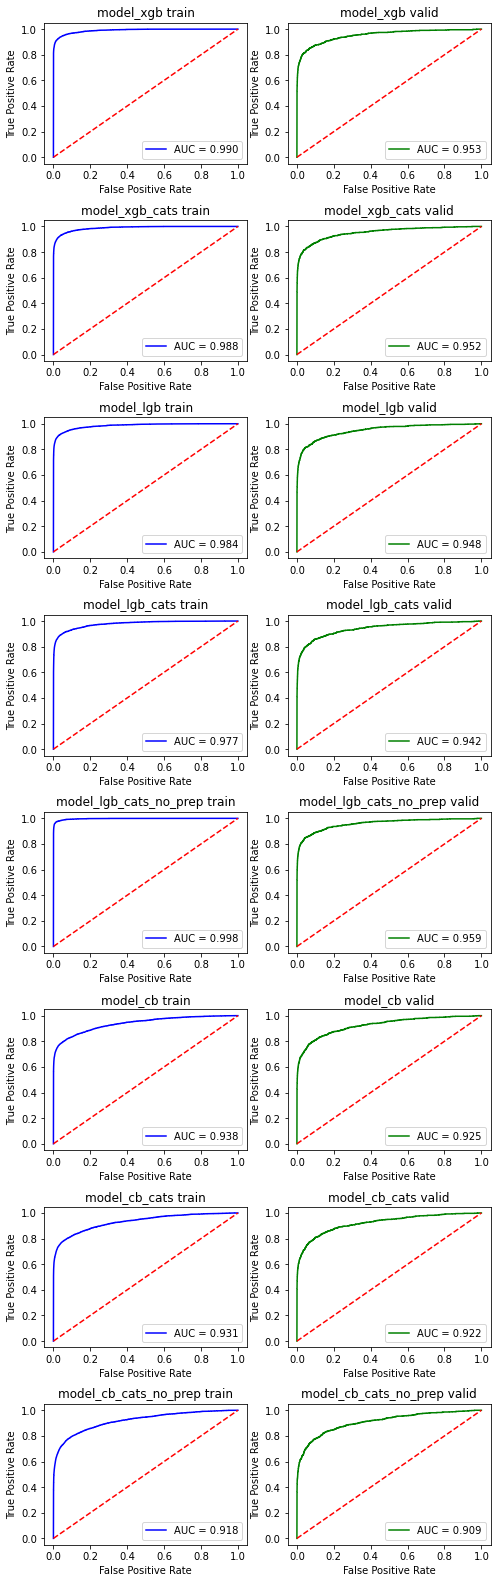

In [44]:
fig, ax = plt.subplots(8, 2, figsize=(8, 28))
for i in range(8):
    fpr, tpr, threshold = roc_curve(y_train, probs_train[i])
    roc_auc = auc(fpr, tpr)
    
    ax[i, 0].plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
    plt.subplots_adjust(hspace = .4)
    ax[i, 0].legend(loc = 'lower right')
    ax[i, 0].plot([0, 1], [0, 1],'r--')
    ax[i, 0].set_title(f'{titles[i]} train')
    ax[i, 0].set_ylabel('True Positive Rate')
    ax[i, 0].set_xlabel('False Positive Rate')
    
    fpr, tpr, threshold = roc_curve(y_valid, probs_valid[i])
    roc_auc = auc(fpr, tpr)
    
    ax[i, 1].plot(fpr, tpr, 'g', label = 'AUC = %0.3f' % roc_auc)
    plt.subplots_adjust(hspace = .4)
    ax[i, 1].legend(loc = 'lower right')
    ax[i, 1].plot([0, 1], [0, 1],'r--')
    ax[i, 1].set_title(f'{titles[i]} valid')
    ax[i, 1].set_ylabel('True Positive Rate')
    ax[i, 1].set_xlabel('False Positive Rate')

### Выводы: 
Лучше всех на валидационной выборке отработал LightGBM со встроенным обработчиком категориальных переменных, хотя он же на тренировочной ваборке получил почти 1, т.е. судя по всему имеет место переобучение. 

Без встроеной обработки категориальных переменных результат оказался лучше у XGBoost, но не сильно, так же с некоторым переобучениием, но он отрабатывае НУ ОЧЕНЬ ДОЛГО !  

У CatBoost при появлении категориальных переменных сразу ухудшалось качество, что не совсем ясно почему. Так же у CatBoost переобучение отсутствуем (метрика на train и на valid почти одинаковая)  

### Задание на повторение:
Задание не обязательно к выполнению, но очень рекомендуется для понимания набора данных, этот набор данных будет использован и для следующего домашнего задания.  

Задание 1: Построить график распределения времени совершения транзакции для обучающей / тестовой выборки, сделать выводы о том, как разбиты данные и какие виды валидации могут подойти для данной задачи.  
Задание 2: построить scatter-plot зависимости суммы транзакции от времени совершения транзакции. Построить графики для обучающей выборки и для тестовой выборки, для обучающей выборки - построить как для целевой переменной = 0, так и для переменной = 1. Сделать выводы.  
Задание 3: построить распределение признака TransactionAmt в логарифмическом масштабе, сделать выводы о близости распредления к нормальному распределению. Построить распределение признака в логарифмическому масштабе для обучающей выборк и для тестовой выборки, сделать выводы.  
Задание 4: построить распределение признака целевой переменной в зависимости от значений категориальных признаков ProductCD, card4, card6. Сделать выводы.  

### Задание 1: 
Построить график распределения времени совершения транзакции для обучающей / тестовой выборки, сделать выводы о том, как разбиты данные и какие виды валидации могут подойти для данной задачи. 

<AxesSubplot:xlabel='TransactionDT', ylabel='Density'>

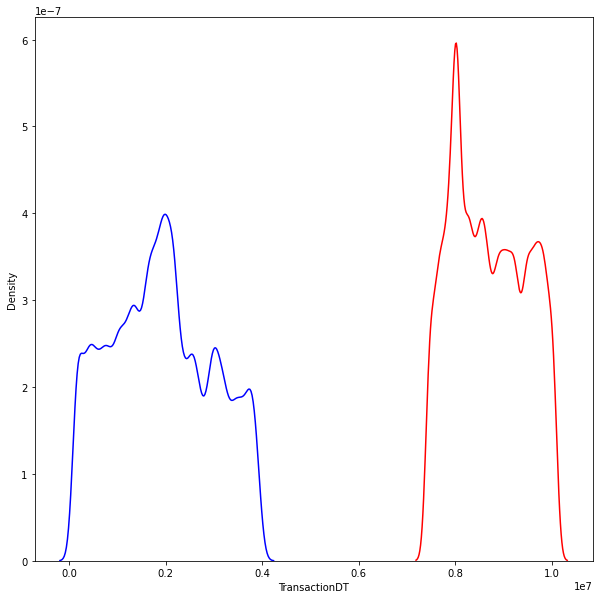

In [45]:
feature = 'TransactionDT'

fig, axes = plt.subplots(figsize=(10, 10))

train_, test_ = train[feature].copy(), test[feature].copy()
sns.kdeplot(train_, color="blue", label="train")
sns.kdeplot(test_, color="red", label="test")

#### Выводы
Данные разбиты во времени (сначало train, а test через некоторый промежуток). Валидацию тоже следует проводить относительно времени транзакций (выбрать точку во времени и брать все что до нее train, все что после valid)

### Задание 2: 
построить scatter-plot зависимости суммы транзакции от времени совершения транзакции. Построить графики для обучающей выборки и для тестовой выборки, для обучающей выборки - построить как для целевой переменной = 0, так и для переменной = 1. Сделать выводы. 

<AxesSubplot:title={'center':'isFraud = 1'}, xlabel='TransactionDT', ylabel='TransactionAmt'>

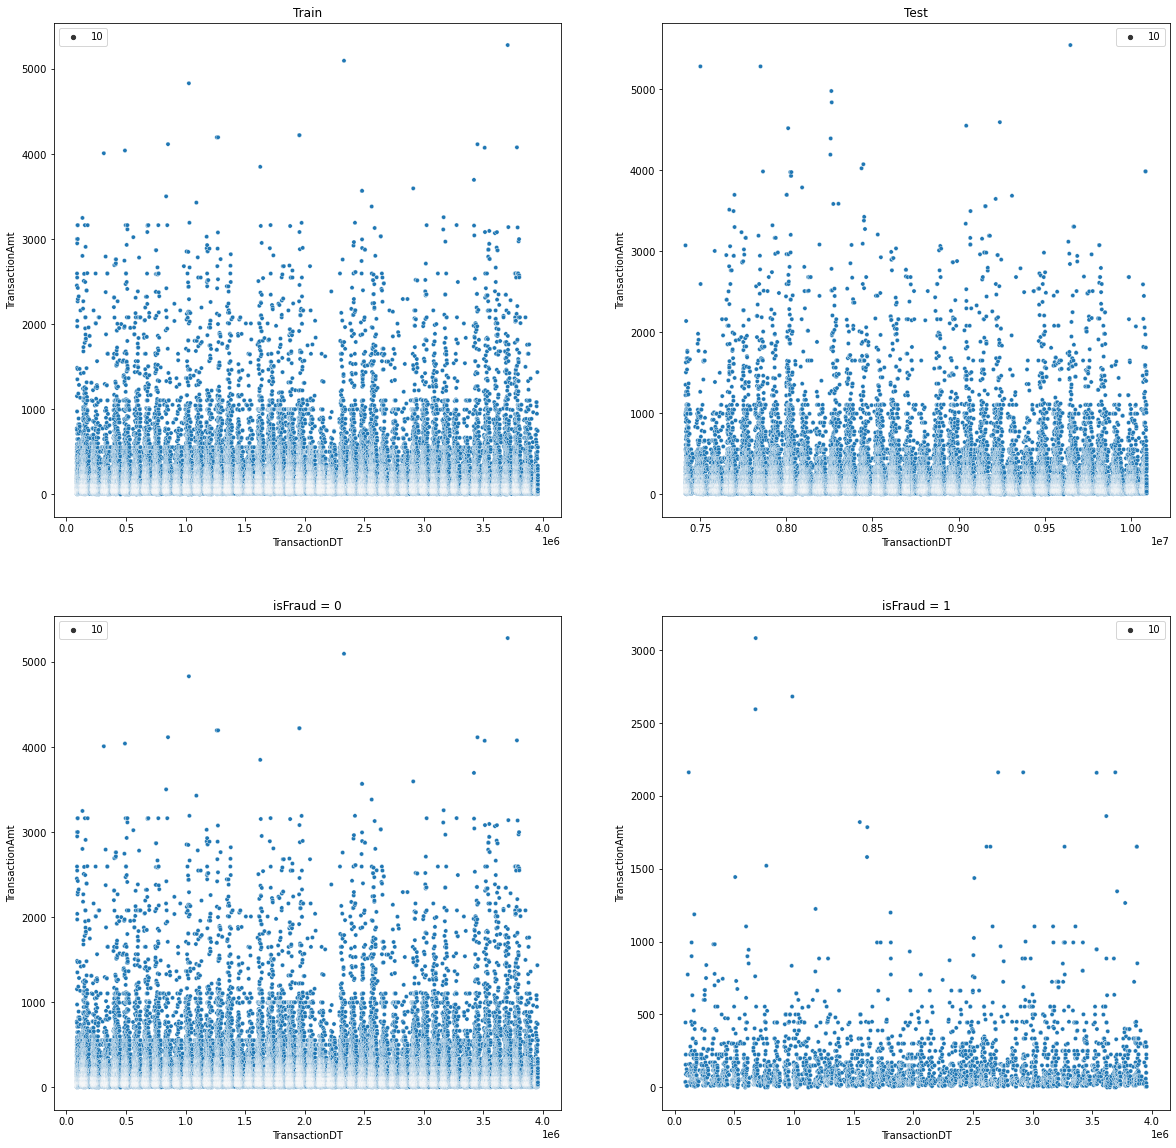

In [46]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

axes[0, 0].set_title(f'Train')
sns.scatterplot(train['TransactionDT'], train['TransactionAmt'], ax=axes[0,0], size=10)
axes[0, 1].set_title(f'Test')
sns.scatterplot(test['TransactionDT'], test['TransactionAmt'], ax=axes[0,1], size=10)
axes[1, 0].set_title(f'isFraud = 0')
sns.scatterplot(train[train['isFraud'] == 0]['TransactionDT'], train[train['isFraud'] == 0]['TransactionAmt'], ax=axes[1,0], size=10)
axes[1, 1].set_title(f'isFraud = 1')
sns.scatterplot(train[train['isFraud'] == 1]['TransactionDT'], train[train['isFraud'] == 1]['TransactionAmt'], ax=axes[1,1], size=10)

#### Выводы

Судя по графикам зависимости суммы транзакции от времени совершения транзакции какой либо нету, на train и test распределения одинаковые, а вот в случае мошеннических транзакций средняя сумма транзакции ниже.

### Задание 3: 
построить распределение признака TransactionAmt в логарифмическом масштабе, сделать выводы о близости распредления к нормальному распределению. Построить распределение признака в логарифмическому масштабе для обучающей выборк и для тестовой выборки, сделать выводы.

((array([-4.47331496, -4.27993957, -4.17494737, ...,  4.17494737,
          4.27993957,  4.47331496]),
  array([-1.23100148, -0.85802182, -0.85802182, ...,  8.48259139,
          8.53600513,  8.57148249])),
 (0.925504691398344, 4.35868299529907, 0.9926366609895168))

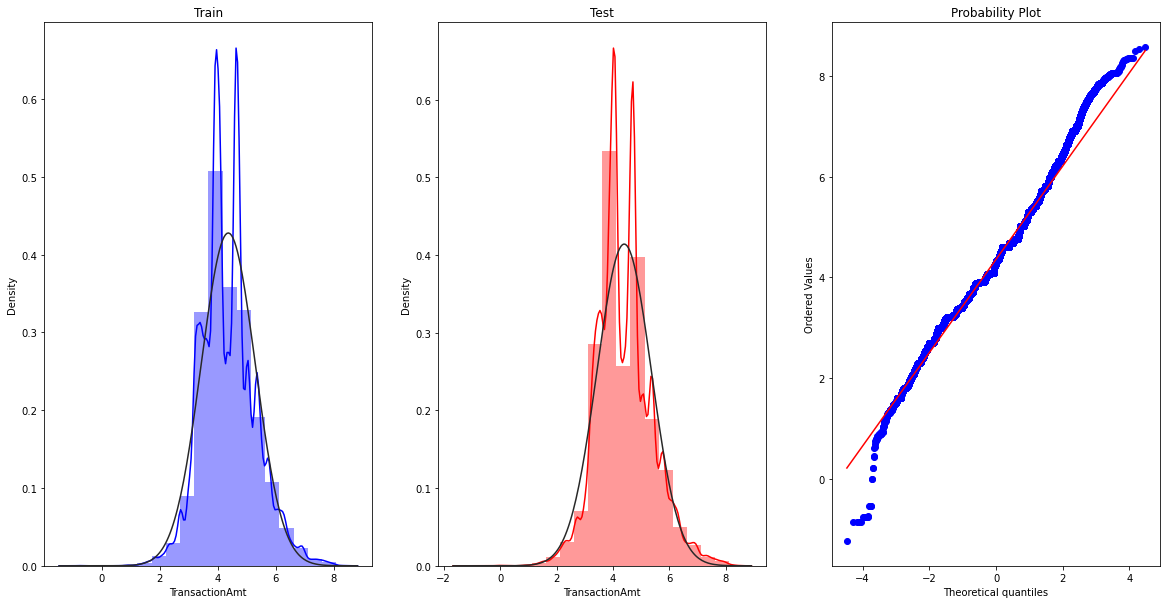

In [47]:
feature = 'TransactionAmt'

fig, axes = plt.subplots(1, 3, figsize=(20, 10))

train_, test_ = train[feature].copy(), test[feature].copy()
axes[0].set_title(f'Train')
sns.distplot(np.log(train_), ax=axes[0], bins=20, color="blue", label="train", fit=st.norm)
axes[1].set_title(f'Test')
sns.distplot(np.log(test_), ax=axes[1], bins=20, color="red", label="test", fit=st.norm)
probplot(np.log(train_), plot=plt)

#### Выводы

Распределение признака TransactionAmt в логарифмическом масштабе на train и test довольно далеко от нормального распределения.

### Задание 4: 
построить распределение признака целевой переменной в зависимости от значений категориальных признаков ProductCD, card4, card6. Сделать выводы.  

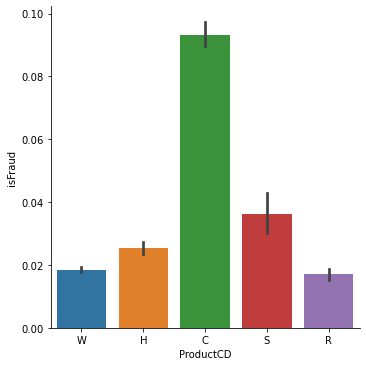

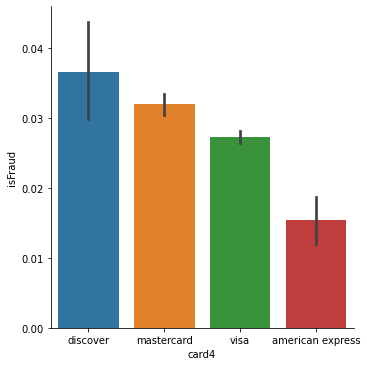

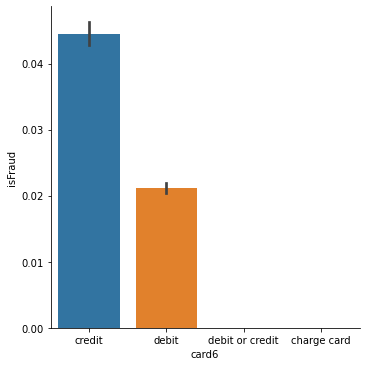

In [48]:
features = ['isFraud', 'ProductCD', 'card4', 'card6']

data = train[features].copy()
sns.catplot(x="ProductCD", y="isFraud", kind="bar", data=data)
sns.catplot(x="card4", y="isFraud", kind="bar", data=data)
sns.catplot(x="card6", y="isFraud", kind="bar", data=data)

#### Выводы

На графиках мы видим, то большинство мошеннических операций приходится на продукт "С", по картам discover (mastercard и visa не сильно отстают), типа credit (debit в два раза реже, а в других типах вообще отсутствуют).